In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("msft.csv")
df.head()

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free


In [3]:
df.isnull().sum()

Name                  1
Rating                1
No of people Rated    0
Category              1
Date                  1
Price                 1
dtype: int64

In [4]:
df.dtypes

Name                   object
Rating                float64
No of people Rated      int64
Category               object
Date                   object
Price                  object
dtype: object

In [5]:
df['Price'] = df['Price'].str.strip('₹ ')
df['Price'] = df['Price'].str.strip(',')
df['Price'].replace({'Free':'0'}, inplace=True)
df["Price"] = df["Price"].str.replace(",","").astype(float)
df.Price.unique()


array([   0. ,  144. ,   54. ,   99. ,  219. ,  269. ,  134. ,  164. ,
        109. , 1624. , 1099. , 1349. ,   59. ,  154. ,  119. ,   94. ,
         69. ,  139. ,  189. ,  549. ,   79. , 2599. ,  299. ,  574. ,
        329.4, 1521.8,  324. ,  824. , 5449. ,   89.5,  114. ,  194. ,
        319. ,  624. , 2149. , 1149. ,  434. ,  279. ,  209. ,  699. ,
       1899. ,  489. ,   54.5,   64. ,    nan])

In [6]:
df.dtypes

Name                   object
Rating                float64
No of people Rated      int64
Category               object
Date                   object
Price                 float64
dtype: object

In [7]:
rupee_to_usd = 0.013349
df['DPrice'] = df['Price']*rupee_to_usd
df.DPrice
df.isnull().sum()

Name                  1
Rating                1
No of people Rated    0
Category              1
Date                  1
Price                 1
DPrice                1
dtype: int64

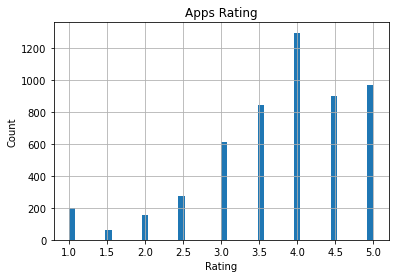

In [10]:
df['Rating'].hist(bins=50)
plt.title("Apps Rating")
plt.ylabel("Count")
plt.xlabel("Rating")
plt.show()


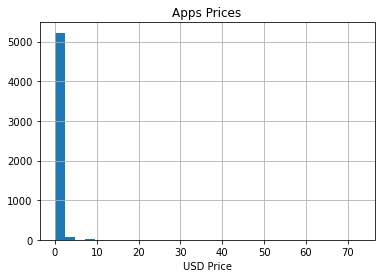

In [11]:
df['DPrice'].hist(bins=30)
plt.title("Apps Prices")
plt.xlabel("USD Price")
plt.show()

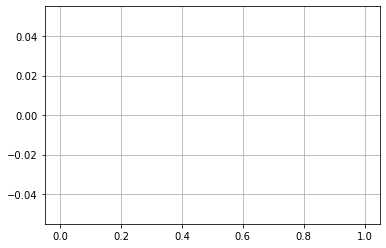

In [12]:
filt = (df['DPrice']>0) & (df['DPrice']>3000)
df.loc[filt, 'DPrice'].hist()
plt.show()

In [15]:
df.to_excel('msft1.xls')

In [16]:
f

,Name,Rating,No of people Rated,Category,Date,Price,DPrice
0,Dynamic Reader,3.5,268,Books,07-01-2014,0.0,0.000000
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,0.0,0.000000
2,BookViewer,3.5,593,Books,29-02-2016,0.0,0.000000
3,Brick Instructions,3.5,684,Books,30-01-2018,0.0,0.000000
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,0.0,0.000000
...,...,...,...,...,...,...,...
5317,JS King,1.0,720,Developer Tools,19-07-2018,269.0,3.590881
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,64.0,0.854336
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,269.0,3.590881
5320,Simply Text,4.0,386,Developer Tools,23-01-2014,219.0,2.923431
